In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.signal import argrelmax
%matplotlib inline
import seaborn as sns
from preprocessing import read_tdms
from preprocessing import plot_heat_peaks

In [2]:
df = pd.read_csv('00_Nac1p_9_spons.Current vs time.txt', header=None)
trace = df[0]

x = list(find_peaks(trace, threshold=0.02)[0])
y = []
for idx,i in enumerate(x):
    val = trace[i]
    y.append(val)

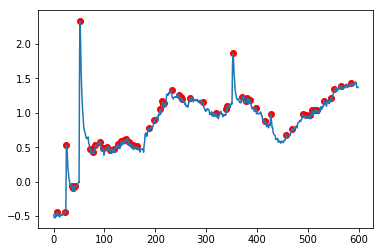

In [3]:
plt.scatter(x,y,color='red')
plt.plot(trace)

In [4]:
trace = np.array(trace)

In [5]:
x2 = list(argrelmax(trace, order=8)[0])
y2 = []
for idx,i in enumerate(x2):
    val = trace[i]
    y2.append(val)
print(len(x2),len(y2))

20 20


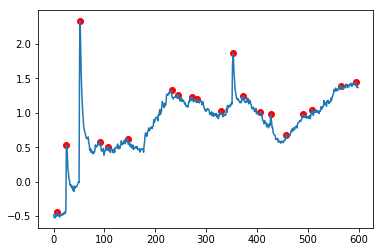

In [6]:
plt.scatter(x2,y2,color='red')
plt.plot(trace)

In [7]:
x2

[7,
 25,
 52,
 91,
 107,
 146,
 232,
 244,
 273,
 282,
 329,
 353,
 373,
 407,
 427,
 457,
 490,
 508,
 565,
 595]

In [8]:
color_plot = read_tdms('00_Nac1p_9_spons.tdms')

C:\Users\dmhedges\Anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


In [9]:
color_plot[333-50:333+50].shape

(100, 600)

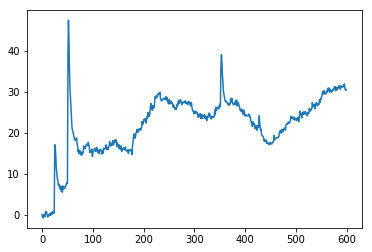

In [10]:
plt.plot(color_plot[333])

In [11]:
color_plot = read_tdms('00_Nac1p_9_spons.tdms')

def find_peaks_x(color_plot=color_plot):
    peak_x = []
    peak_y = []
    for idx,i in enumerate(color_plot[:]):
        peaks = argrelmax(i, order=8)[0]
        
        for j in peaks:
            peak_x.append(j)
            peak_y.append(idx)
    return peak_x,peak_y

In [12]:
x3,y3 = find_peaks_x()
print(len(x3),len(y3))

20592 20592


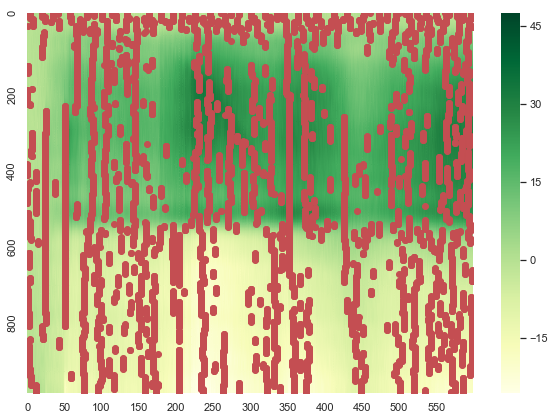

In [13]:
sns.set(rc={'figure.figsize': (10,7)})
ax = sns.heatmap(color_plot, xticklabels=50, yticklabels=200, cmap='YlGn')
plt.plot(x3,y3, 'ro')

In [14]:
def find_peaks_y(color_plot=color_plot):
    peak_x = []
    peak_y = []
    for idx,i in enumerate(color_plot.T[:]):
        peaks = argrelmax(i, order=8)[0]
        
        for j in peaks:
            peak_y.append(j)
            peak_x.append(idx)
    return peak_x,peak_y

In [15]:
x5,y5 = find_peaks_y()
print(len(x5),len(y5))

3641 3641


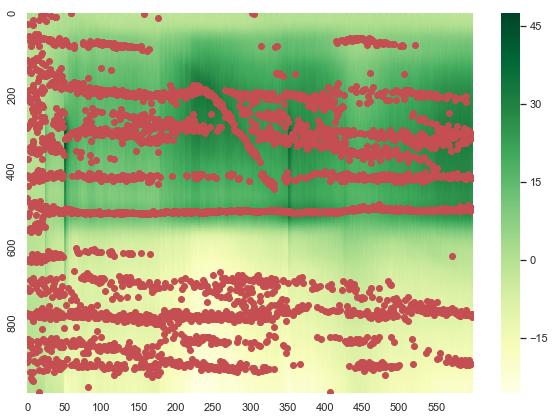

In [16]:
sns.set(rc={'figure.figsize': (10,7)})
ax = sns.heatmap(color_plot, xticklabels=50, yticklabels=200, cmap='YlGn')
plt.plot(x5,y5, 'ro')

In [17]:
array1 = (1,2,3,4,5,6)
array2 = ('a','b','c','d','e','f')

zipped = zip(array1, array2)
list(zipped)

[(1, 'a'), (2, 'b'), (3, 'c'), (4, 'd'), (5, 'e'), (6, 'f')]

In [18]:
x_peak_arrays = list(zip(x3,y3))
y_peak_arrays = list(zip(x5,y5))


In [19]:
intersect2 = set(x_peak_arrays).intersection(set(y_peak_arrays))

In [20]:
x8 = []
y8 = []
for i in intersect2:
    x8.append(i[0])
    y8.append(i[1])

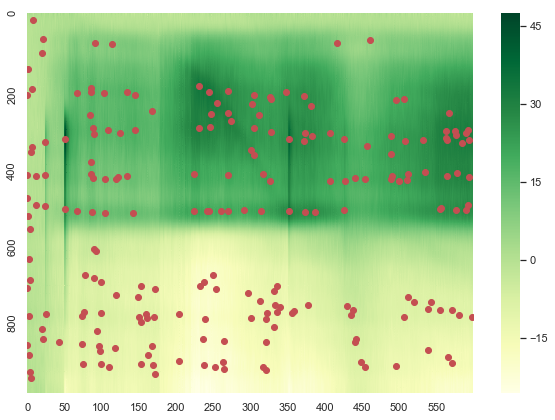

In [21]:
sns.set(rc={'figure.figsize': (10,7)})
ax = sns.heatmap(color_plot, xticklabels=50, yticklabels=200, cmap='YlGn')
plt.plot(x8,y8, 'ro')

In [26]:
# Master Function
# Read in color plot
spons = '00_Nac1p_9_spons.tdms'

def find_peaks(filename):
    # Get data in
    color_plot = read_tdms(filename)
    
    # Get coordinates of x-direction peaks
    x3,y3 = find_peaks_x(color_plot=color_plot)

    # Get coordinates of y-direction peaks
    x5,y5 = find_peaks_y(color_plot=color_plot)

    # Get intersection of x and y peaks
    x_peak_arrays = list(zip(x3,y3))
    y_peak_arrays = list(zip(x5,y5))
    intersect = set(x_peak_arrays).intersection(set(y_peak_arrays))

    x_final = []
    y_final = []
    for i in intersect:
        x_final.append(i[0])
        y_final.append(i[1])
        
    return x_final,y_final

In [27]:
%%timeit 
find_peaks(spons)

C:\Users\dmhedges\Anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


403 ms ± 2.64 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [32]:
from full_processing import get_dataframe

get_dataframe(spons)

AttributeError: 'str' object has no attribute 'shape'